In [8]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from math import ceil

In [9]:
sns.set_context("talk", font_scale=1.4)

In [10]:
df1= pd.read_csv('../data/analysis/Hit.csv')
df2= pd.read_csv('../data/analysis/Hit_prediction.csv')
df3= pd.read_csv('../data/analysis/model_comparison.csv')
%store -r feature_importance
%store -r labels

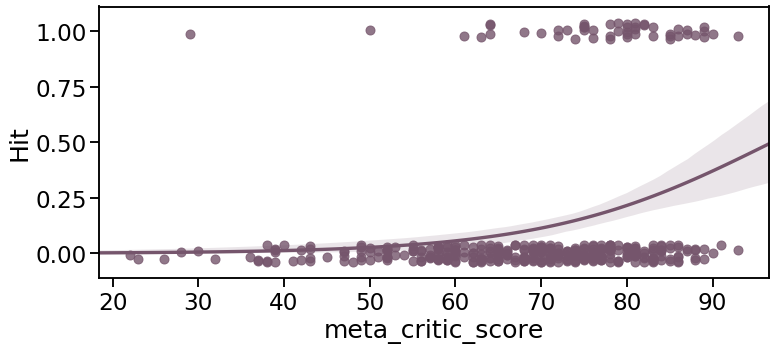

In [12]:
n = ceil(0.05 * len(df1['Hit']))
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="meta_critic_score", y="Hit", data=df1.sample(n=n),
            logistic=True, n_boot=500, y_jitter=.04, color="#75556c")
plt.show()

In [13]:
df2.describe()

,Unnamed: 0,Hit_Probability
count,6327.000000,6327.000000
mean,3705.457563,0.105446
std,2119.205744,0.126947
min,9.000000,0.000054
25%,1865.500000,0.018774
50%,3675.000000,0.056249
75%,5584.500000,0.140866
max,7373.000000,0.817741


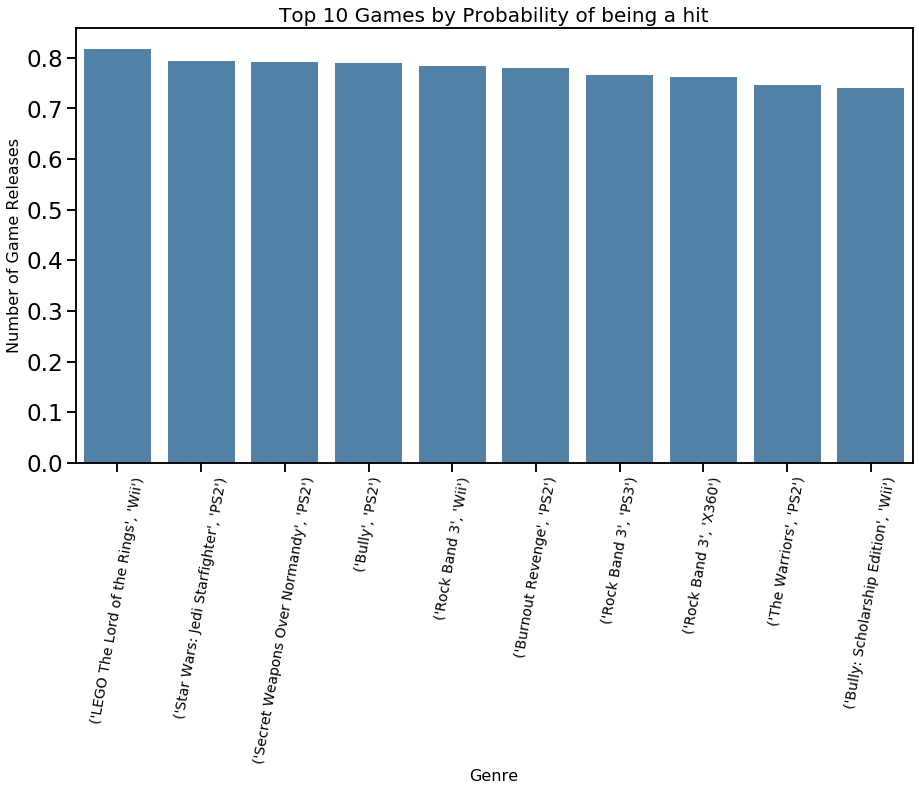

Unnamed: 0  Hit_Probability
name                         platform                             
LEGO The Lord of the Rings   Wii             2855         0.817741
Star Wars: Jedi Starfighter  PS2             6074         0.792766
Secret Weapons Over Normandy PS2             6077         0.792009
Bully                        PS2              712         0.790060
Rock Band 3                  Wii             2700         0.783620
Burnout Revenge              PS2             3995         0.780233
Rock Band 3                  PS3             2702         0.766387
                             X360            2699         0.762478
The Warriors                 PS2              760         0.745554
Bully: Scholarship Edition   Wii              761         0.740243

In [17]:
plt.figure(figsize=(15,8))
data = pd.DataFrame(df2)
data=data[:10]
data=data.set_index(['name','platform'])

colors = sns.color_palette("spring", len(data))
ax = sns.barplot(y = 'Hit_Probability' , x = data.index, data=data, color='steelblue')
ax.set_ylabel(ylabel='Number of Game Releases', fontsize=16)
ax.set_xlabel(xlabel='Genre', fontsize=16)
ax.set_title(label='Top 10 Games by Probability of being a hit', fontsize=20)
ax.set_xticklabels(labels = data.index, fontsize=14,rotation=80)

plt.show();
data

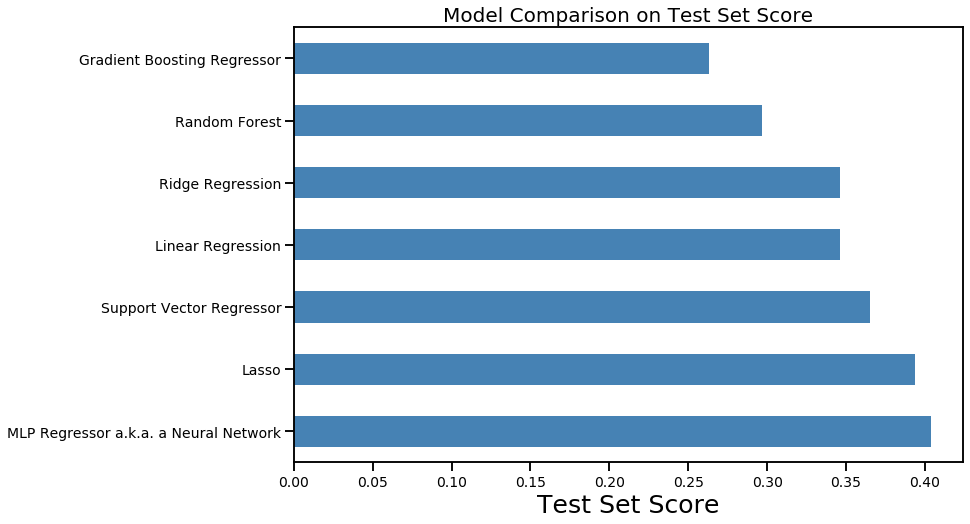

In [15]:
df3.sort_values("tss", ascending=False).plot(x="model", y="tss", kind="barh",color="steelblue", legend=False,figsize=(12,8))
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Test Set Score"); plt.xticks(size=14)
plt.title("Model Comparison on Test Set Score", size=20);

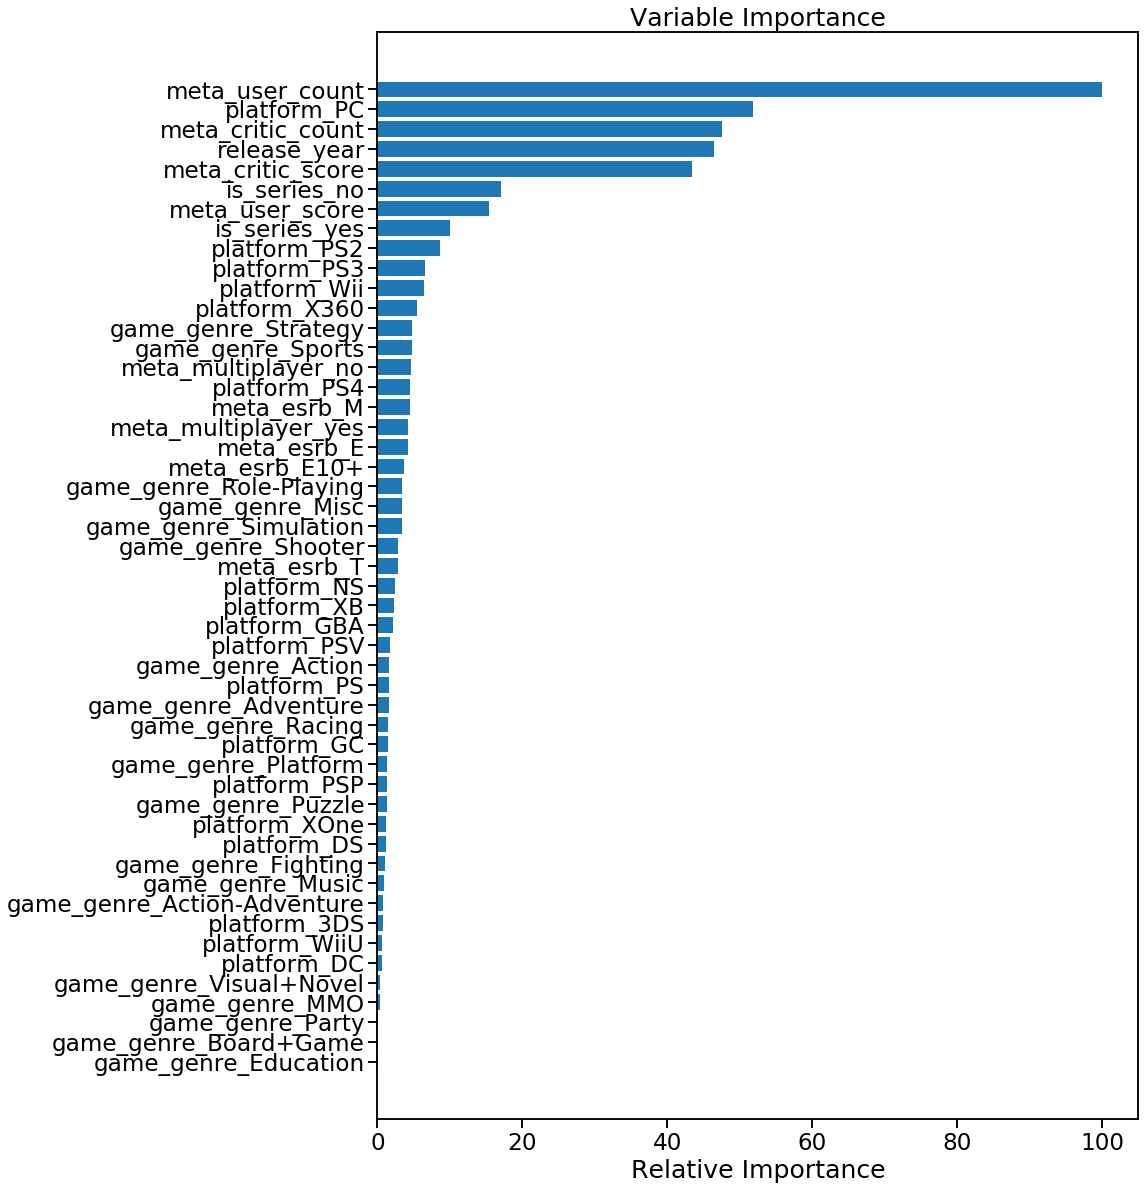

In [16]:
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(30,20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,labels)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## **Conclusion**

* It seems hits are mostly found near high critic scores, while non-hits can vary in scores but don't have as strong of a presence in the high score ranges.

* Mean Hit probabily was 0.105446, suggesting games on average have about a 10% chance of becoming a hit with approx. a 80% chance.

* LEGO The Lord of the Rings on Wii was predicted as being the game that had the best probsbility of becoming a hit. According to our dataset it got one million two hundred ten thousand sales, so I guess it was a hit!

* Surprisingly, the best model IS NOT the deep neural network. Instead it's the Gradient Boosting Regressor. I would have initially picked it out to be the second best one out of the lot. This speaks to it's power as a model and also to the fact that training deep neural networks is challenging and a lot of the time it seems that you're better off choosing a simpler model, as the computational expense that DNN's bring with them may not justify the decrease in MSRE. In a sense it's kind of a "don't bring a gun to a fistfight" type of situation, if that makes any sense...

* So the GBR's best cross-validation score was 0.26 and its test score was 0.28 as measured in RMSE. This means that first off, the model generalizes well as the difference between the cross-validation score and the test set score is small. In more concrete terms however, it means that the average error the model makes in its predicitons amount to 280k units. That means that in making a forecast, on average the model will be wrong in forecasting video game sales by 330k units.

* Additionally, an interesting finding is that the amount of users and the amount of critics rating a game on Metacritic is more important in explaining the results than the scores themselves. My initial hypothesis would have been the other way around. In this regard, it seems that it doesn't necessarily matter as much that a game has a single esteemed critic scoring the game a 100, but rather that the game has lots of critics scoring it potentially even at a lower level to drive those unit sales.

* In terms of platforms, the only ones that maintained some relevant measure of explanatory power was whether the game was released on PC and whether it was released on Wii. There may be many interpretations here, so it is best to be wary in interpreting this. A game being released on Wii might speak towards explaining lower unit sales due to the platform not being as popular as it's counter parts PS3 and Xbox 360. In the case of a game being released on PC, it is difficult to say which way this explanatory power goes, as PC is such a large platform with all kinds of games being released on it.

* However, let's get to the real question: is the model good or not? Well, it depends on the point of view. If you would use this model to forecast the unit sales of a small video game developer's game, you would be better of using other methods. The reason is that typically independent smaller studios sell under a million copies. In this case, an error of 330k units is a lot and can have a tremendous financial impact on the company, if you are relying on forecasting sales with this model. However, if you use this model to forecast the unit sales of larger AAA game developer's game, an error of 330k units, isn't that fatal. If you're forecasting the unit sales of a developer who typically sells say 3 million copies, then a roughly 10 % deviation is not fatal. Sure it isn't close to perfect, but these type of models typically aren't.

* So where might this model come in valuable then? I think the most obvious example is in business teams in large video game companies. They typically make sales estimates that are then reflected in project budgets etc. and most of the time, the estimates are made in similar ways that for example equity analysts make forecasts: coming up with a number off of the top of your head :) This model could thus be used as an extra input in making those sales forecasts.
